In [1]:
import sys
import numpy as np
import ot
sys.path.append('./lib')
import matplotlib.pyplot as pl
from mini_batch_gw import calculate_stoc_gamma2, calculate_expectation_gamma2

In [2]:
def make_spiral(n_samples, noise=.5):
    n = np.sqrt(np.random.rand(n_samples,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_samples,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_samples,1) * noise
    return np.array(np.hstack((d1x,d1y)))

get_rot= lambda theta : np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]])

def get_data(n_samples, theta, scale=1, transla=0):
    Xs = make_spiral(n_samples=n_samples, noise=1)-transla
    Xt = make_spiral(n_samples=n_samples, noise=1) #np.copy(Xs)
    
    A=get_rot(theta)
    
    Xt = (np.dot(Xt,A))*scale+transla
    
    return Xs,Xt


In [3]:
n_samples=300
theta=0#p.pi/2
scale=1

Xs,Xt=get_data(n_samples,theta,scale=scale,transla=10)

temp,Xt2=get_data(n_samples,np.pi/2,scale=scale)
temp,Xt22=get_data(n_samples,np.pi/4,scale=scale)
Xt2[:,0]+=70
Xt22[:,0]+=35

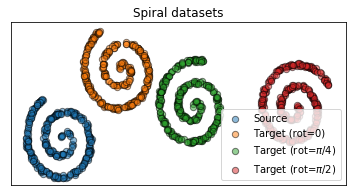

In [5]:
a=0.5
pl.figure(2,figsize=(6,3))
pl.clf()
pl.scatter(Xs[:,0], Xs[:,1], marker='o', s=40, edgecolors='k', alpha=a, label='Source')
pl.scatter(Xt[:,0], Xt[:,1], marker='o', s=40, edgecolors='k', alpha=a, label="Target (rot=0)")
pl.scatter(Xt22[:,0], Xt22[:,1], marker='o', s=40, edgecolors='k', alpha=a, label="Target (rot=$\pi/4$)")
pl.scatter(Xt2[:,0], Xt2[:,1], marker='o', s=40, edgecolors='k', alpha=a, label="Target (rot=$\pi/2$)")
pl.xticks([])
pl.yticks([])
pl.title('Spiral datasets')
pl.legend()
pl.show()

In [6]:
nbrot = 8
nbloop = 5
angles = np.linspace(0,np.pi/2,nbrot)
scale=1
a, b = ot.unif(n_samples), ot.unif(n_samples)

print(angles)
print(b.sum())

[0.         0.22439948 0.44879895 0.67319843 0.8975979  1.12199738
 1.34639685 1.57079633]
1.0000000000000002


In [7]:
GW = np.zeros((nbloop,nbrot))
MBGW1 = np.zeros((nbloop,nbrot))
MBGW2 = np.zeros((nbloop,nbrot))
MBGW3 = np.zeros((nbloop,nbrot))
rota = {}

In [8]:
m1 = 10
m2 = 50
m3 = 100
num_iter = 1000

for i in range(nbloop):
    
    Xs, Xt0 = get_data(n_samples, 0, scale=scale, transla=10)
    
    for j,theta in enumerate(angles):
        
        A = get_rot(theta)
        Xt = Xt0.dot(A)
        M1 = ot.dist(Xs, Xs)
        M2 = ot.dist(Xt, Xt)
        M1 /= M1.max()
        M2 /= M2.max()
                        
        GW[i, j] = ot.gromov.gromov_wasserstein2(M1, M2, a, b, 'square_loss')[0]
        print('GW : ', GW[i, j])
        MBGW1[i, j] = calculate_stoc_gamma2(Xs, Xt, a, b, m1, m1, num_iter, M1, M2)
        print('MB GW : ', MBGW1[i, j])
        MBGW2[i, j] = calculate_stoc_gamma2(Xs, Xt, a, b, m2, m2, num_iter, M1, M2)
        print('MB GW : ', MBGW2[i, j])
        MBGW3[i, j] = calculate_stoc_gamma2(Xs, Xt, a, b, m3, m3, num_iter, M1, M2)
        print('MB GW : ', MBGW3[i, j])
                        
    print('!!!!!!!!!!!!!!!!{0} Loop Done!!!!!!!!!!!!!!!!'.format(i))

GW :  0.0038091625318900156
MB GW :  0.035945191752797624
MB GW :  0.016045067789358585
MB GW :  0.010641479168006106
GW :  0.003809162531890017
MB GW :  0.03596279073464707
MB GW :  0.016035095686840767
MB GW :  0.010805007173669001
GW :  0.003809162531890016
MB GW :  0.03543073119343432
MB GW :  0.015882425867881862
MB GW :  0.010709780855521964
GW :  0.0038091625318900143
MB GW :  0.0362193003082884
MB GW :  0.016227467180050813
MB GW :  0.010936352143518676
GW :  0.00380916253189001
MB GW :  0.036865981134242984
MB GW :  0.01622227784934606
MB GW :  0.01086429510043935
GW :  0.0038091625318900178
MB GW :  0.03609961578003596
MB GW :  0.01605721173046146
MB GW :  0.010761114580781307
GW :  0.0038091625318900134
MB GW :  0.035046482798774446
MB GW :  0.01605592293177908
MB GW :  0.010905096250364168
GW :  0.0038091625318900165
MB GW :  0.035438696275096694
MB GW :  0.016042915254428747
MB GW :  0.010729743856509462
!!!!!!!!!!!!!!!!0 Loop Done!!!!!!!!!!!!!!!!
GW :  0.00258051537270045

In [9]:
def plot_perf(nlist, err, color, label, errbar=False, perc=20):
    pl.plot(nlist, err.mean(0), label=label, color=color)
    if errbar:
        pl.fill_between(nlist, np.percentile(err,perc,axis=0), np.percentile(err,100-perc,axis=0),
                    alpha=0.2, facecolor=color)

<Figure size 432x288 with 0 Axes>

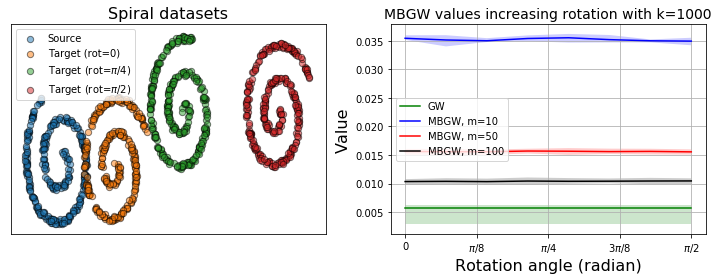

In [10]:
do_err=True
pl.clf()
fig = pl.figure(figsize=(10,4))
ax1=pl.subplot(1, 2, 1)
a=0.5
ax1.scatter(Xs[:,0], Xs[:,1], marker='o', s=40, edgecolors='k', alpha=a, label='Source')
ax1.scatter(Xt[:,0], Xt[:,1], marker='o', s=40, edgecolors='k', alpha=a, label="Target (rot=0)")
ax1.scatter(Xt22[:,0], Xt22[:,1], marker='o', s=40, edgecolors='k', alpha=a, label="Target (rot=$\pi/4$)")
ax1.scatter(Xt2[:,0], Xt2[:,1], marker='o', s=40, edgecolors='k', alpha=a, label="Target (rot=$\pi/2$)")
ax1.set_title('Spiral datasets', fontsize=16)
ax1.legend()
pl.xticks([])
pl.yticks([])
#ax1.set_aspect('equal')
pl.tight_layout()


ax2=pl.subplot(1, 2, 2)
plot_perf(angles, GW, 'g', 'GW', do_err)   
plot_perf(angles, MBGW1, 'b', 'MBGW, m={}'.format(m1), do_err)  
plot_perf(angles, MBGW2, 'r', 'MBGW, m={}'.format(m2), do_err)  
plot_perf(angles, MBGW3, 'black', 'MBGW, m={}'.format(m3), do_err)  
pl.title("MBGW values increasing rotation with k={}".format(num_iter), fontsize=14)
pl.grid()     
pl.xlabel('Rotation angle (radian)', fontsize=16)

pl.xticks((0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2),('0','$\pi/8$','$\pi/4$','$3\pi/8$','$\pi/2$'))
pl.ylabel('Value', fontsize=16)
pl.legend(loc=6)
#ax2.set_aspect('equal')
pl.tight_layout()


pl.savefig('imgs/spiral_mbgw.pdf')